#### Use case here is : We want to sell more of mobile screen gaurds. 
We have 2 options to recommend this product, with

1.Cell phone
OR
2.Phone case

Analysing when are thecustoners more likely to buy it, when recommnended with Cell phone or whith Phone case.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
data = pd.read_excel("Recommendation_data.xlsx")
data.head()
#purchase flag = 0 , not bought the screen  gaurd
#purchase flag = 1 , bought the screen gaurd

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag
0,1.0,Recommend_screenguard,2021-07-02,With phone,0.0
1,2.0,Recommend_screenguard,2021-07-03,With phone,0.0
2,3.0,Recommend_screenguard,2021-07-04,With cover,1.0
3,4.0,Recommend_screenguard,2021-07-05,With phone,0.0
4,5.0,Recommend_screenguard,2021-07-06,With cover,1.0


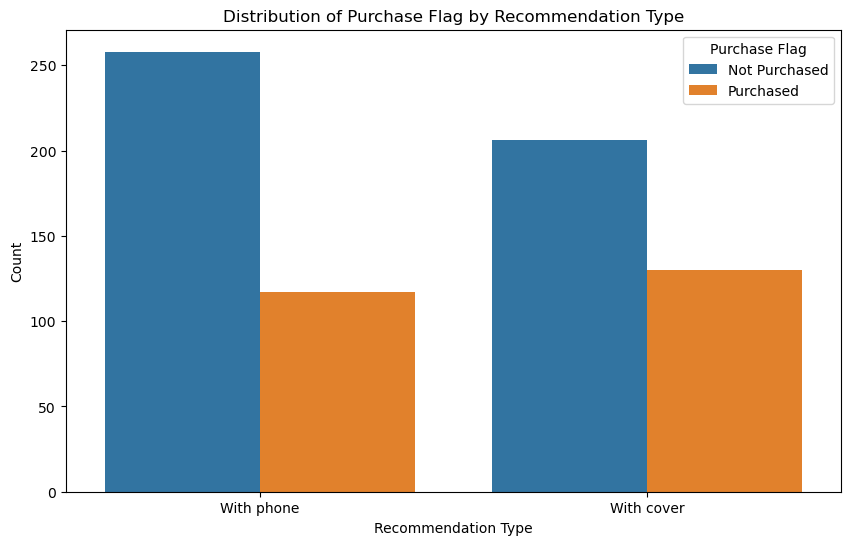

In [32]:
#Distribution of Purchase Flag by Recommendation Type
plt.figure(figsize=(10, 6))
sns.countplot(x='suggestion_type', hue='purchase_flag', data=data)
plt.title('Distribution of Purchase Flag by Recommendation Type')
plt.xlabel('Recommendation Type')
plt.ylabel('Count')
plt.legend(title='Purchase Flag', labels=['Not Purchased', 'Purchased'])
plt.show()


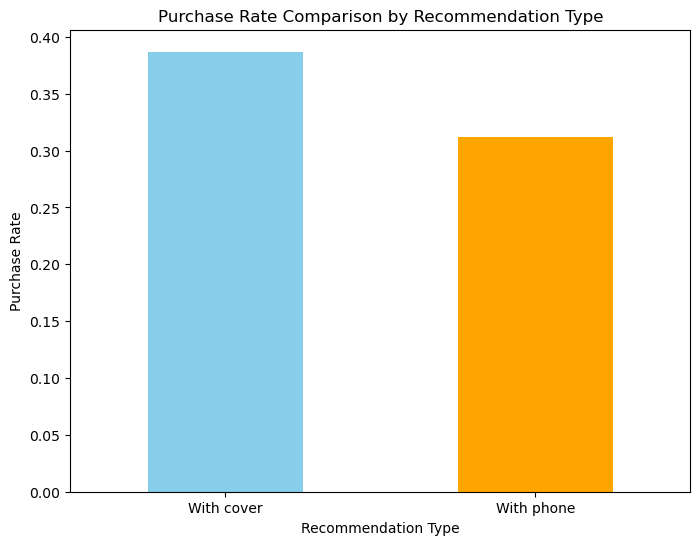

In [33]:
#Purchase Rate Comparison
purchase_rate = data.groupby('suggestion_type')['purchase_flag'].mean()
plt.figure(figsize=(8, 6))

purchase_rate.plot(kind='bar', color=['skyblue', 'orange'])

plt.title('Purchase Rate Comparison by Recommendation Type')
plt.xlabel('Recommendation Type')
plt.ylabel('Purchase Rate')
plt.xticks(rotation=0)
plt.show()

In [35]:
# converting date column into dd-mm-yyy format 
data['Recommendation_date'] = pd.to_datetime(data['Recommendation_date'])

# extracting the year and create a new (year) column
data['Year'] = data['Recommendation_date'].dt.year

# extracting the year and create a new (month) column
data['Month'] = data['Recommendation_date'].dt.month
#df['Year-Month'] = food_data['Date'].dt.to_period('M')

# Display the updated DataFrame
data.head()

,customer_id,Recommendation_name,Recommendation_date,suggestion_type,purchase_flag,Year,Month
0,1.0,Recommend_screenguard,2021-07-02,With phone,0.0,2021,7
1,2.0,Recommend_screenguard,2021-07-03,With phone,0.0,2021,7
2,3.0,Recommend_screenguard,2021-07-04,With cover,1.0,2021,7
3,4.0,Recommend_screenguard,2021-07-05,With phone,0.0,2021,7
4,5.0,Recommend_screenguard,2021-07-06,With cover,1.0,2021,7


<Figure size 1000x600 with 0 Axes>

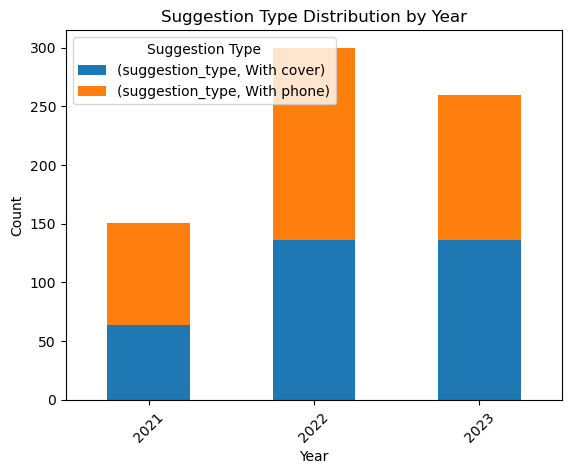

In [40]:
#grouped_data = data.groupby(['Year', 'suggestion_type']).size().unstack(fill_value=0)
grouped_data = data.groupby('Year').agg({'suggestion_type': 'value_counts'}).unstack(fill_value=0)

# Plotting the EDA
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Suggestion Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Suggestion Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

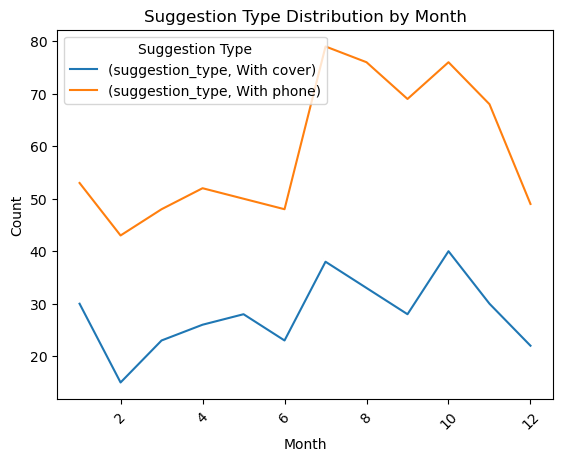

In [43]:
grouped_data = data.groupby('Month').agg({'suggestion_type': 'value_counts'}).unstack(fill_value=0)

# Plotting the EDA
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', stacked=True)
plt.title('Suggestion Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Suggestion Type')
plt.show()

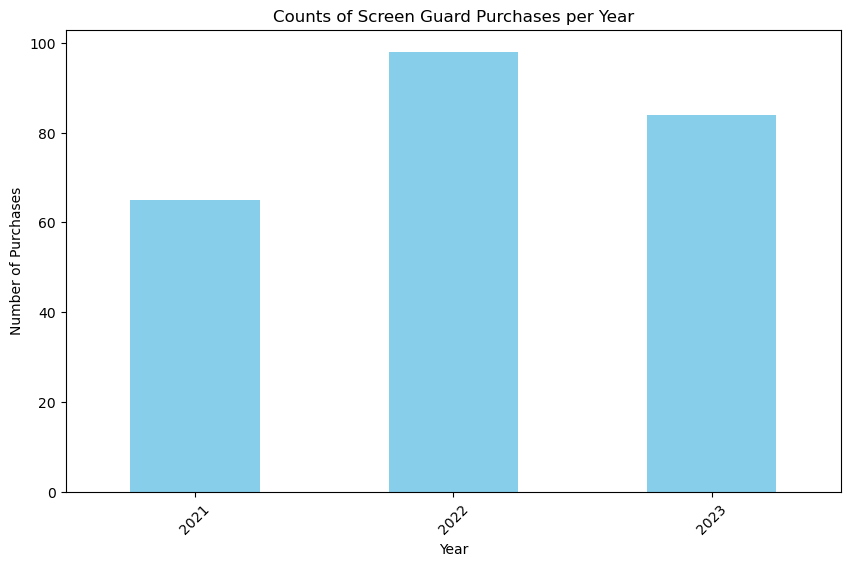

In [45]:
purchased_data = data[data['purchase_flag'] == 1]
grouped_data = purchased_data.groupby('Year').size()

# Plotting the EDA
plt.figure(figsize=(10, 6))

# Plot the bar plot for counts of purchases per year
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Counts of Screen Guard Purchases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)

# Show plot
plt.show()

In [20]:
#remove the rows that contains NULL values
data.dropna(inplace = True)
data.shape

(711, 5)

In [21]:
data.groupby("suggestion_type")["purchase_flag"].value_counts()

suggestion_type  purchase_flag
With cover       0.0              206
                 1.0              130
With phone       0.0              258
                 1.0              117
Name: count, dtype: int64

In [22]:
#contengency table
CT = pd.crosstab(data["suggestion_type"], data["purchase_flag"]).values
CT

array([[206, 130],
       [258, 117]])

In [23]:
#Purchase rate
with_cover = 130 / (130+206) #38%
with_phone = 117 / (117+258) #31%
print(with_cover, with_phone)

0.3869047619047619 0.312


In [24]:
null_hypo = "No relationship between purchase rate and recommendation type"
alt_hypo = "There is a relationship between purchase rate and recommendation type"


### Why chi-square test ?
You can use a chi-square test of independence when you have two categorical variables. 

It allows you to test whether the two variables are related to each other. 

If two variables are independent (unrelated), the probability of belonging to a certain group of one variable isn't affected by the other variable.

In [26]:
from scipy.stats import chi2_contingency

chi2_statistic, p_value, dof, expected_values = chi2_contingency (CT, correction = False)
print("Chi-square statistice is :",chi2_statistic)
#print("expected values :",expected_values ) 
print("p_value :",p_value)
#p_vlauve <0.05 we can reject null hypo

Chi-square statistice is : 4.385751976925068
p_value : 0.03624050241176425


Chi-square statistic is approximately 4.386, which indicates that there is some difference between the observed and expected frequencies.

The p-value associated with the chi-square statistic is approximately 0.036. This p-value is less than the  significance level of 0.05. 
Since the p-value is less than 0.05, we have evidence to reject the null hypothesis, which assumes that there is no relationship between the variables.

Therefore, we can conclude that there is a statistically significant relationship between the variables.
In summary, based on the provided chi-square test results, we can say that the variables are related.

In [15]:
#95% CI
prob = 0.95
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print ('Dependent, we can reject HO safely') 
else:
    print ('Independent, no suffiecinet evidence to reject HO')


significance=0.050, p=0.036
Dependent, we can reject HO safely


There is a relationship between purchase rate and recommendation type